test if the distribution of ages is the same for 

1) male and female riders

2) day and night riders

use 3 tests: KS, Pearson's, Spearman's. 

For the KS do the test with the entire dataset and with a subset 200 times smaller

Choose a significant threshold for the whole eercise. 

For each test phrase the Null Hypothesis in words.

Describe the return of the scipy function you use in each case.

State the result in terms of rejection of the Null.

In [133]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats as stat
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
os.getenv("PUIDATA")

'/home/cusp/df1676/PUIdata'

In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isdir(os.getenv("PUIDATA")):
        os.system('mkdir '+ os.getenv("PUIDATA"))

    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
        os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
        os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        #os.system("rm " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        if int(datestring) < 201409:
            os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
        if int(datestring) < 201307:
            print ("Warning: Not Avaliable")

## We use Aug 2015 data for analysis.

In [4]:
datestring = raw_input("Input Year and Month (eg. 201510): ")
#datestring = '201409'
getCitiBikeCSV(datestring)

Input Year and Month (eg. 201510): 201508


In [7]:
df = pd.read_csv(datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [8]:
df.date = pd.to_datetime(df.starttime)

In [12]:
print (df.columns)
print (df.shape)

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')
(1179044, 15)


In [13]:
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [30]:
df.head()
#df.describe()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1,28.0,NaN
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2,NaN,64.0
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1,30.0,NaN
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1,40.0,NaN
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1,37.0,NaN


In [24]:
bins = np.arange(10, 99, 5)

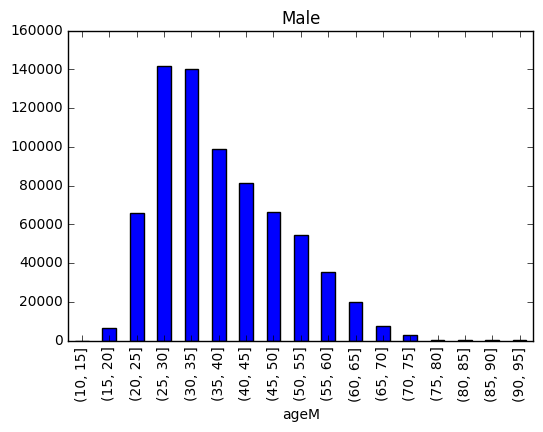

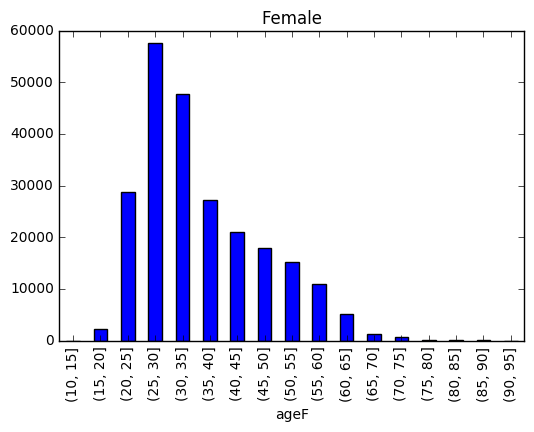

In [44]:
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero])
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero])
axM.plot(kind="bar", title="Male", legend=False)
axF.plot(kind='bar', title="Female", legend=False)

### Fig 1: bar plot of distribution of riders' ages by gender

**?**
<br/>
Prof's note:
<br/>"
this is how the cumulative distributions look like. Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it
"<br/>

In [53]:
bins = np.arange(10, 99, 5)
csM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

In [74]:
diff = np.abs(csM / csM.max() - csF / csF.max())

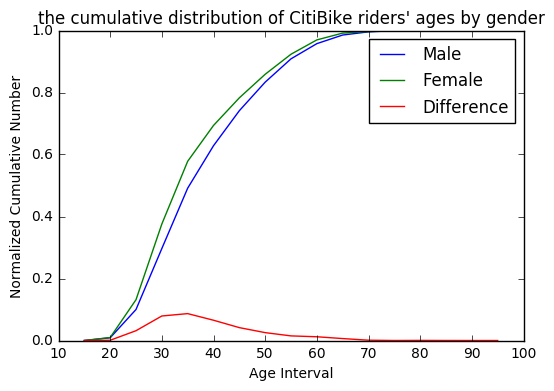

In [81]:
pl.plot(bins[:-1]+5, csM/csM.max(), label="Male")
pl.plot(bins[:-1]+5, csF/csF.max(), label="Female")
pl.plot(bins[:-1]+5, diff, label="Difference")
pl.legend()
pl.xlabel("Age Interval")
pl.ylabel("Normalized Cumulative Number")
pl.title("the cumulative distribution of CitiBike riders' ages by gender")

### Fig2 The cumulative distribution of CitiBike riders' ages by gender

In [89]:
diff.max()

count_nonzero    0.086715
dtype: float64

**?**
<br/>
They look similar! But the difference gets to 8.7%. 

<br/><br/>If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated.
<br/><br/>
Notice that there may be **NaN values you are gonna have to deal with!** 
<br/>*You can do that for example with a Boolean statementsuch as df.ageF[~np.isnan(df.ageF)]*<br/> 
or *you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...*
lets run the scipy KS test

In [84]:
import scipy.stats

### KS tests to compare 2 samples
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [87]:
ks = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print (ks)

Ks_2sampResult(statistic=0.11573706560792094, pvalue=0.0)


**scipy.stat.ks_2samp(sample1, sample2)** return the ks statistics and p-value of two-tail test.
<br/>Suppose we set the significent level as $\alpha$
<br/>if p-value < $\alpha$, we reject the NULL hypothesis, which is two samples are nor from the same distribution.

### Link: Theroy of K-S Test

### Now redo the test with a subsample of the data: take only 1 ride every of 200


In [ ]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS

In [104]:
index = np.arange(0,df.shape[0],200)
df_sub = df.iloc[index,:]
df_sub.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1,28.0,NaN
200,747,8/1/2015 00:19:37,8/1/2015 00:32:04,225,W 14 St & The High Line,40.741951,-74.008030,525,W 34 St & 11 Ave,40.755942,-74.002116,22443,Customer,NaN,0,NaN,NaN
400,458,8/1/2015 00:40:50,8/1/2015 00:48:28,469,Broadway & W 53 St,40.763441,-73.982681,318,E 43 St & Vanderbilt Ave,40.753202,-73.977987,22355,Subscriber,1975.0,1,40.0,NaN
600,355,8/1/2015 01:06:21,8/1/2015 01:12:17,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,282,Kent Ave & S 11 St,40.708273,-73.968341,22486,Subscriber,1979.0,1,36.0,NaN
800,402,8/1/2015 01:36:33,8/1/2015 01:43:15,388,W 26 St & 10 Ave,40.749718,-74.002950,446,W 24 St & 7 Ave,40.744876,-73.995299,22335,Subscriber,1953.0,1,62.0,NaN


In [105]:
bins = np.arange(0, 99, 10)

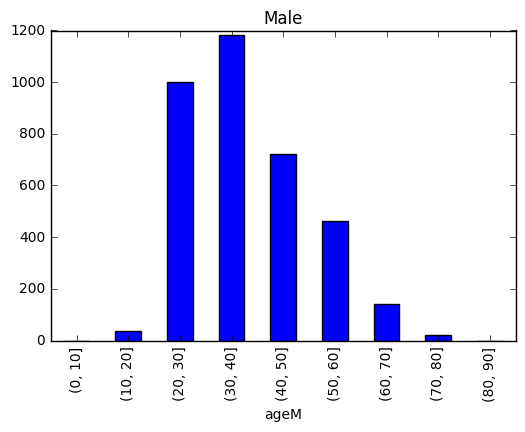

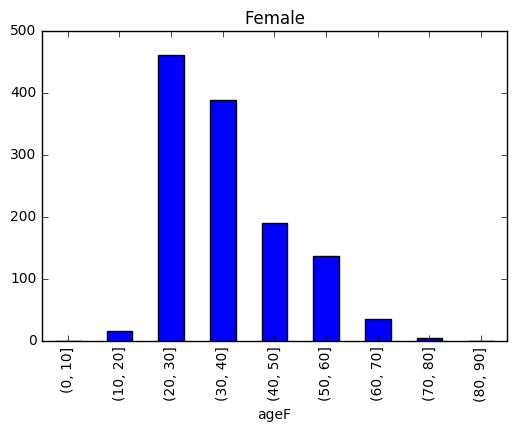

In [117]:
subM = df_sub['ageM'].groupby(pd.cut(df_sub['ageM'], bins)).agg([count_nonzero])
subF = df_sub.ageF.groupby(pd.cut(df_sub['ageF'], bins)).agg([count_nonzero])
subM.plot(kind = "bar", title="Male", legend=False)
subF.plot(kind = 'bar', title='Female', legend=False)

### Fig 3: the distribution of rider's age by gender (subset)

In [129]:
diff_sub = np.abs(subM/subM.max() - subF/subF.max())
#diff

In [122]:
subM_cs = df_sub.ageM.groupby(pd.cut(df_sub.ageM, bins)).agg([count_nonzero]).cumsum()
subF_cs = df_sub.ageF.groupby(pd.cut(df_sub.ageF, bins)).agg([count_nonzero]).cumsum()

In [126]:
subM_cs_normalized = subM_cs/subM_cs.max()
subF_cs_normalized = subF_cs/subF_cs.max()

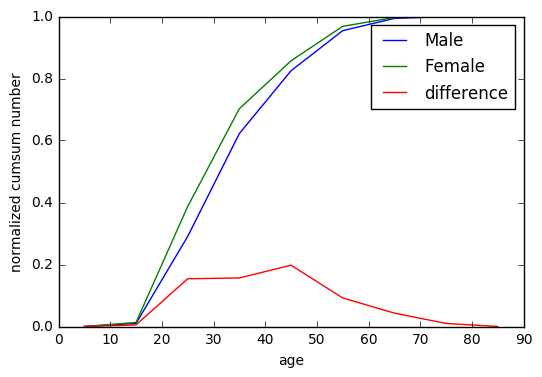

In [131]:
pl.plot(bins[:-1]+5, subM_cs_normalized, label="Male")
pl.plot(bins[:-1]+5, subF_cs_normalized, label="Female")
pl.plot(bins[:-1]+5, diff_sub, label="difference")
pl.xlabel('age')
pl.ylabel('normalized cumsum number')
pl.legend()

### Fig 4: The cumulative distribution of CitiBike riders' ages by gender (subset)

##  K-S Test for Subset 

In [136]:
ks_sub = scipy.stats.ks_2samp(df_sub.ageM[~np.isnan(df_sub.ageM)], df_sub.ageF[~np.isnan(df_sub.ageF)])
print (ks_sub)

Ks_2sampResult(statistic=0.1383058224521649, pvalue=9.6308171098613584e-16)


The ks_2samp return the k-s statistics and p-value.
<br/>
since, p-value < 0.05, we can say under the significant level 0.05, reject the null hypothesis and choose the alternative hypothesis which is two samples are from the same distribution.

<br/><br/>

## Pearson's test for correlation 
 

notice that the Pearson's is a pairwise test: the samples need to be
<br/>a. sorted and
<br/>b. the same size!
<br/><br/> All Data

Since Pearson's correlation test need samples with same size, and the subsets (female and male) have different number of rows. Here we randomly selesct *235911* rows of Male subset, and calculate the correlation between this new subset and Female subset. 

In [437]:
pearsonM=np.array(df.ageM[~np.isnan(df.ageM)])
pearsonF=np.array(df.ageF[~np.isnan(df.ageF)])

row_counts = int(min(pearsonF.shape[0], pearsonM.shape[0])*1.0)
print (row_counts)
sub_index_male = np.random.choice(pearsonM.shape[0], row_counts, replace=False)
sub_index_female = np.random.choice(pearsonF.shape[0], row_counts, replace= False)

pearsonM_age = sort(pearsonM[sub_index_male])
pearsonF_age = sort(pearsonF[sub_index_female])

235991


In [438]:
scipy.stats.spearmanr(list(pearsonM_age), list(pearsonF_age))

SpearmanrResult(correlation=0.9989568433779259, pvalue=0.0)

In [440]:
#pl.scatter(x=pearsonF_age,y=pearsonM_age)

Corr=0.999 means x and y have a strong correlation. And p-value < 0.05 means under the significent level 0.05, we can reject the Null hypothesis which is the corr=0. Thus we can choose the alternative hhypothesis that is x and y has a statistical significent strong relationship.

In [444]:
scipy.stats.spearmanr(pearsonF_age,pearsonM_age,nan_policy='omit')

SpearmanrResult(correlation=0.9989568433779259, pvalue=0.0)